In [1]:
import rioxarray as rxa
import matplotlib.pyplot as plt
import contextily as cx
from os.path import join

In [11]:
r1_fp = '/Users/zachkeskinen/Documents/ice-road-copters/test/09_EXPORT/outv2.tif'
r2_fp = '/Users/zachkeskinen/Documents/ice-road-copters/notebooks/quantum.tif'

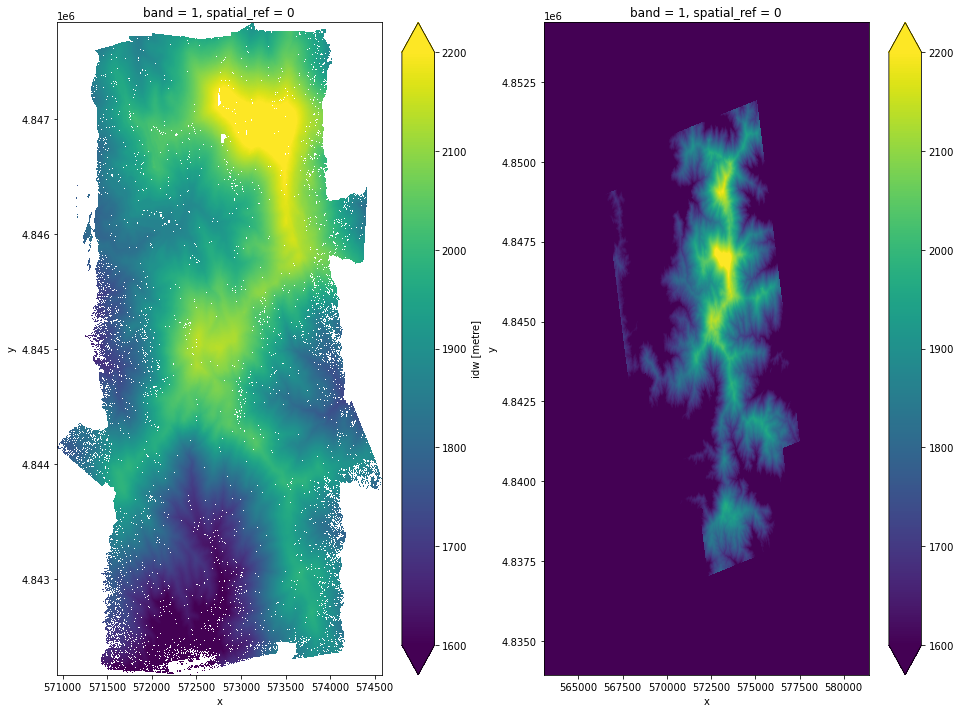

In [12]:
f, (ax, ax2) = plt.subplots(1, 2, figsize = (16,12))

r1 = rxa.open_rasterio(r1_fp, mask_and_scale=True)
r1.plot(ax = ax, vmin = 1600, vmax = 2200)
r2 = rxa.open_rasterio(r2_fp, mask_and_scale=True)
r2.plot(ax = ax2, vmin = 1600, vmax = 2200)

# cx.add_basemap(ax= ax, crs = r1.rio.crs)
# cx.add_basemap(ax = ax2, crs = r2.rio.crs)

In [5]:
# r2_repro = r2.rio.reproject_match(r1)
# r2_repro.rio.to_raster(join('/Users/zachkeskinen/Documents/ice-road-copters/test/dems','quantum_utm.tif'))

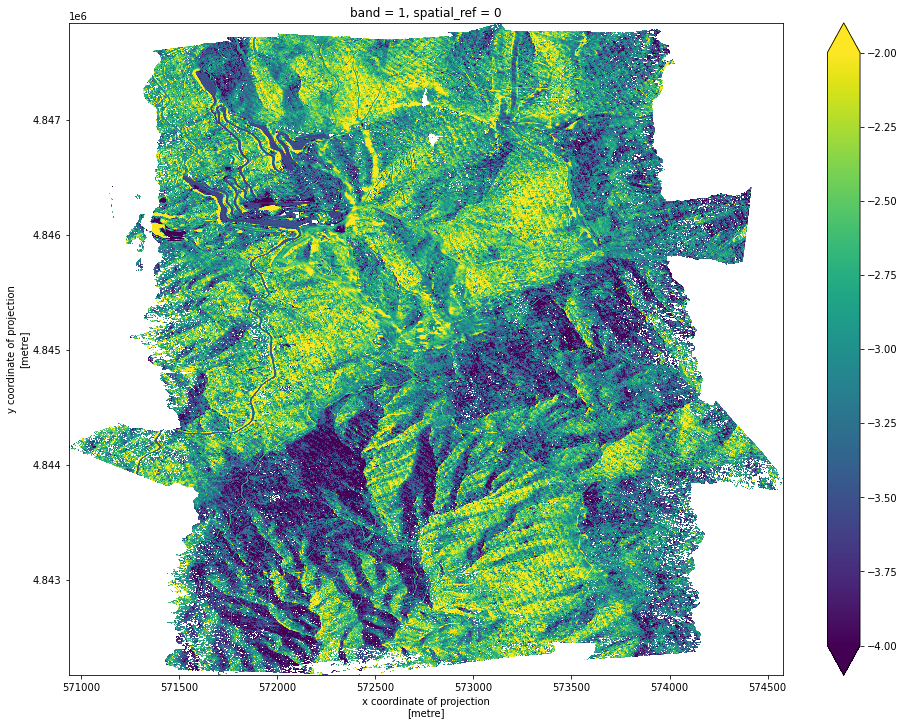

In [19]:
r2_repro = r2.rio.reproject_match(r1)
diff = r1-r2_repro
clip = diff.rio.clip_box(*r1.rio.bounds())
f, (ax) = plt.subplots(1, 1, figsize = (16,12))
clip.plot(ax = ax, add_colorbar = True, vmin = -4, vmax = -2)
# cx.add_basemap(ax = ax2, crs = diff.rio.crs)